<a href="https://colab.research.google.com/github/Katla19/AdEase-Time-Series/blob/main/AdEase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
ec = pd.read_csv('ec.csv')
tt = pd.read_csv('train_1.csv')

dataset link: https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb


In [ ]:
ec.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
tt.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
ec['Exog'].unique()

array([0, 1])

In [ ]:
tt.shape

(145063, 551)

In [ ]:
ec.shape

(550, 1)

In [ ]:
tt.duplicated().sum()

np.int64(0)

In [ ]:
t=tt.copy()

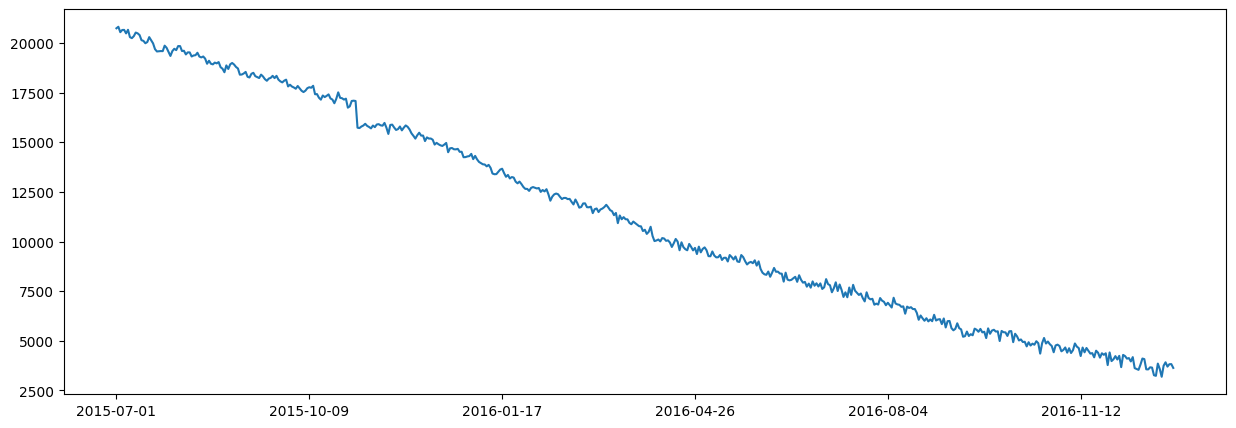

In [ ]:
import matplotlib.pyplot as plt

i=t.head(2).columns[1:][range(0,549)].values
plt.figure(figsize=(15, 5))
t.isnull().sum()[i].plot()
plt.show()
#missing values decrease by new date

In [ ]:
i=t.isnull().sum().sort_values(ascending=False).index
t.fillna(0, inplace=True)

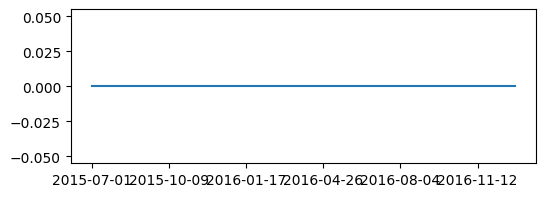

In [ ]:
i=t.head(2).columns[1:][range(0,549)].values
plt.figure(figsize=(6,2))
t.isnull().sum()[i].plot()
plt.show()

In [ ]:
t['language'] = t['Page'].str.extract(r'_([a-z\-]+)\.wikipedia\.org')
t['language'].unique()

array(['zh', 'fr', 'en', nan, 'ru', 'de', 'ja', 'es'], dtype=object)

In [ ]:
lang_map = {
    'en': 'English',
    'zh': 'Chinese',
    'fr': 'French',
    'ru': 'Russian',
    'de': 'German',
    'ja': 'Japanese',
    'es': 'Spanish'
}
t['language'] = t['language'].map(lang_map).fillna('Unknown')
t['language'].unique()

array(['Chinese', 'French', 'English', 'Unknown', 'Russian', 'German',
       'Japanese', 'Spanish'], dtype=object)

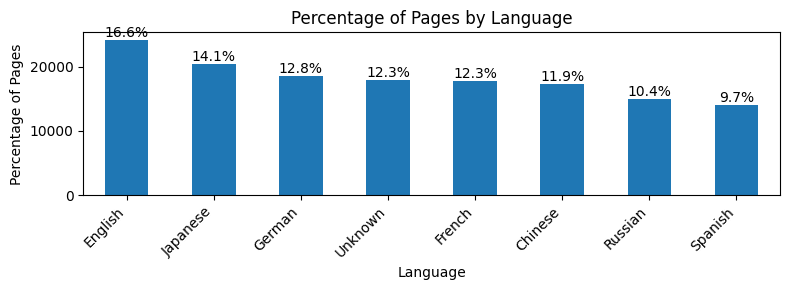

In [ ]:
lang_counts = t['language'].value_counts()
plt.figure(figsize=(8, 3))
ax = lang_counts.plot(kind='bar')
plt.title('Percentage of Pages by Language')
plt.xlabel('Language')
plt.ylabel('Percentage of Pages')
plt.xticks(rotation=45, ha='right')
total = lang_counts.sum()
for container in ax.containers:
    labels = [f'{w/total*100:.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge')
plt.tight_layout()
plt.show()

In [ ]:
t['accesstype'] =t.Page.str.extract(r'(all-access|mobile-web|desktop)')
t['accesstype'].unique()

array(['all-access', 'desktop', 'mobile-web'], dtype=object)

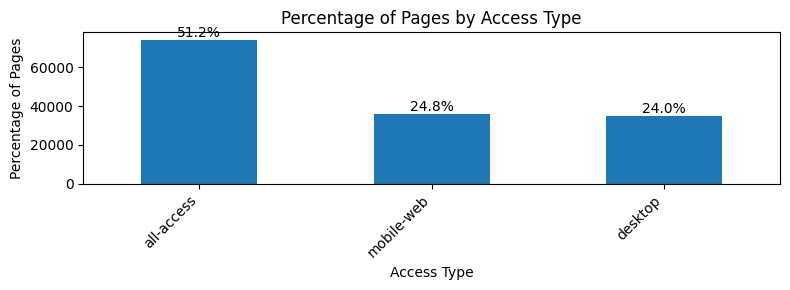

In [ ]:
accesstype_counts = t['accesstype'].value_counts()
plt.figure(figsize=(8, 3))
ax = accesstype_counts.plot(kind='bar')
plt.title('Percentage of Pages by Access Type')
plt.xlabel('Access Type')
plt.ylabel('Percentage of Pages')
plt.xticks(rotation=45, ha='right')
total = accesstype_counts.sum()
for container in ax.containers:
    labels = [f'{w/total*100:.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge')
plt.tight_layout()
plt.show()

In [ ]:
t['origin'] = t.Page.str.extract(r'(spider|agents)')
t['origin'].unique()

array(['spider', 'agents'], dtype=object)

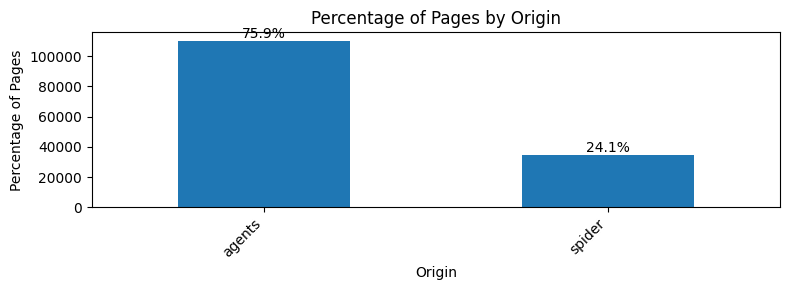

In [ ]:
origin_counts = t['origin'].value_counts()
plt.figure(figsize=(8, 3))
ax = origin_counts.plot(kind='bar')
plt.title('Percentage of Pages by Origin')
plt.xlabel('Origin')
plt.ylabel('Percentage of Pages')
plt.xticks(rotation=45, ha='right')
total = origin_counts.sum()
for container in ax.containers:
    labels = [f'{w/total*100:.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge')
plt.tight_layout()
plt.show()

In [ ]:
t.drop(columns=['Page', 'origin', 'accesstype'], inplace=True)
t.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,language
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,Chinese
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,Chinese
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,Chinese
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,Chinese
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,Chinese


In [ ]:
t.groupby("language").mean()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
language,,,,,,,,,,,,,,,,,,,,,
Chinese,240.582042,240.941958,239.344071,241.653491,257.779674,259.114864,258.832260,265.589529,263.964420,274.414592,...,345.165129,340.420338,360.738580,381.322886,376.447443,376.019618,378.048639,350.719427,354.704452,365.579256
English,3513.862203,3502.511407,3325.357889,3462.054256,3575.520035,3849.736021,3643.523063,3437.871080,3517.459391,3497.571594,...,4997.991248,4683.314294,4971.831757,5140.463373,5770.371661,6040.680728,5860.227559,6245.127510,5201.783018,5127.916418
French,475.150994,478.202000,459.837659,491.508932,482.557746,502.741209,485.945399,476.998820,472.061903,445.495057,...,652.004719,639.459443,618.215931,666.639085,936.884788,858.413100,774.155769,752.712954,700.543422,646.258342
German,714.968405,705.229741,676.877231,621.145145,722.076185,794.832480,770.814256,782.077641,752.939990,701.702593,...,828.738017,839.025934,810.756187,1281.088532,1206.478029,1085.095379,1032.640804,994.657141,949.265649,893.013425
Japanese,580.647056,666.672801,602.289805,756.509177,725.720914,632.399148,615.184181,611.462337,596.067642,619.299300,...,675.104792,968.007733,856.605012,818.374725,779.114728,789.158680,790.500465,865.483236,952.018354,1197.239440
Russian,629.999601,640.902876,594.026295,558.728132,595.029157,640.986287,626.293436,623.360205,638.550726,731.252297,...,896.352017,884.841299,874.274597,1120.990347,1112.840833,1001.209426,931.987685,897.282452,803.271868,880.244508
Spanish,1085.972919,1037.814557,954.412680,896.050750,974.508210,1110.637145,1082.568342,1050.669557,1030.841282,937.129931,...,983.568129,935.082522,880.307911,903.643685,1195.481626,1133.367901,1178.290923,1112.171085,821.671405,787.399531
Unknown,83.479922,87.471857,82.680538,70.572557,78.214562,89.720190,94.939457,99.096724,86.445477,87.353906,...,131.521983,164.889051,140.363764,164.455167,165.821563,147.038925,186.438029,147.297004,164.540577,143.951442


In [ ]:
ns = t.groupby("language").mean().T
if "Unknown" in ns.columns:
    ns= ns.drop("Unknown", axis=1)
ns.index = pd.to_datetime(ns.index)
ns.head()

language,Chinese,English,French,German,Japanese,Russian,Spanish
2015-07-01,240.582042,3513.862203,475.150994,714.968405,580.647056,629.999601,1085.972919
2015-07-02,240.941958,3502.511407,478.202000,705.229741,666.672801,640.902876,1037.814557
2015-07-03,239.344071,3325.357889,459.837659,676.877231,602.289805,594.026295,954.412680
2015-07-04,241.653491,3462.054256,491.508932,621.145145,756.509177,558.728132,896.050750
2015-07-05,257.779674,3575.520035,482.557746,722.076185,725.720914,595.029157,974.508210


In [ ]:
ns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Chinese   550 non-null    float64
 1   English   550 non-null    float64
 2   French    550 non-null    float64
 3   German    550 non-null    float64
 4   Japanese  550 non-null    float64
 5   Russian   550 non-null    float64
 6   Spanish   550 non-null    float64
dtypes: float64(7)
memory usage: 34.4 KB


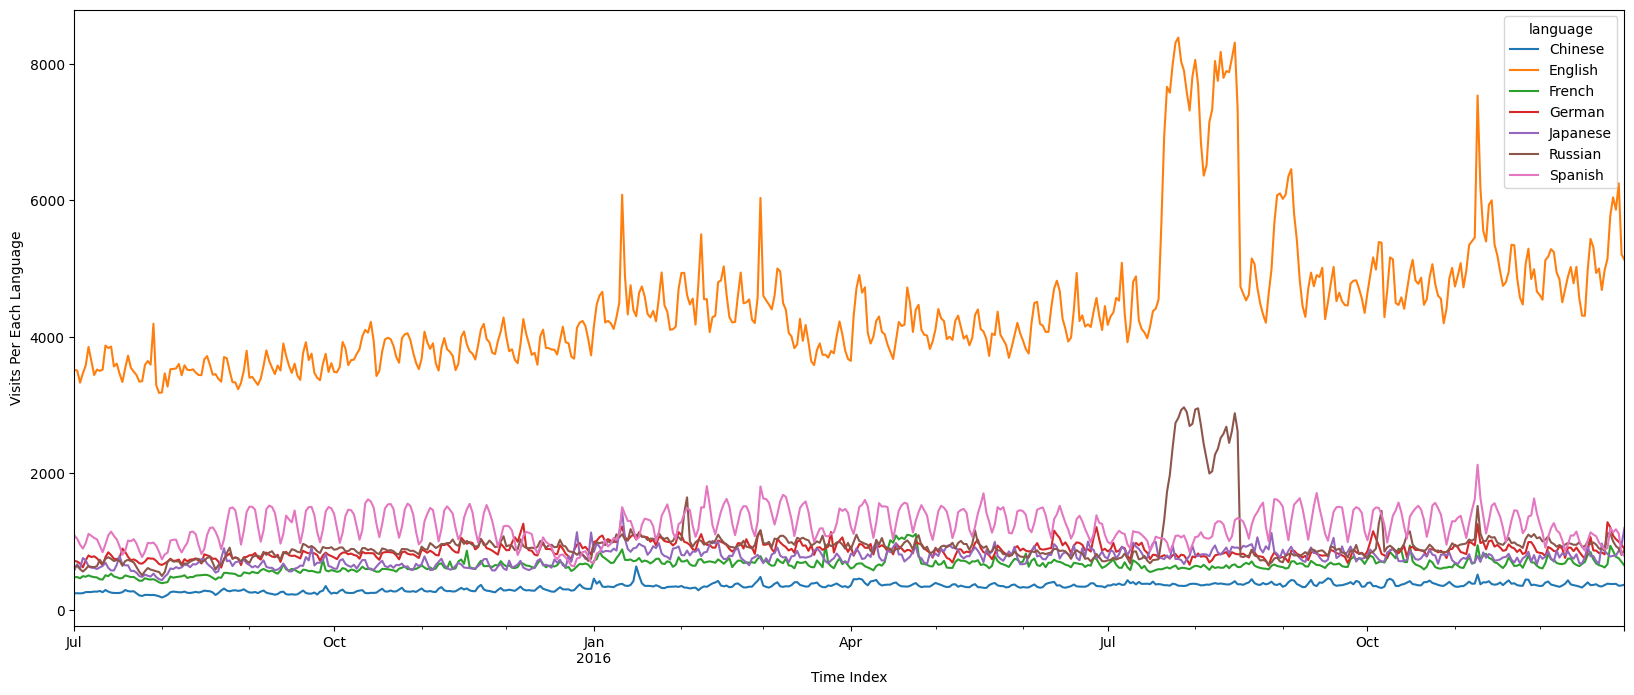

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
ns.plot()
plt.xlabel("Time Index")
plt.ylabel("Visits Per Each Language")
plt.show()

In [ ]:
import statsmodels.api as sm
def Dickey_Fuller_test(ts, significances_level=0.05):
    p_value = sm.tsa.stattools.adfuller(ts.dropna())[1]  # drop NaNs if any
    if p_value <= significances_level:
        print("Time Series is Stationary")
    else:
        print("Time Series is NOT Stationary")
    print("P-value is:", p_value)
for Language in ns.columns:
    print("Language:", Language)
    Dickey_Fuller_test(ns[Language], significances_level=0.05)
    print()

Language: Chinese
Time Series is NOT Stationary
P-value is: 0.447445792293113

Language: English
Time Series is NOT Stationary
P-value is: 0.18953359279992404

Language: French
Time Series is NOT Stationary
P-value is: 0.05149502195245795

Language: German
Time Series is NOT Stationary
P-value is: 0.14097382319729534

Language: Japanese
Time Series is NOT Stationary
P-value is: 0.10257133898557641

Language: Russian
Time Series is Stationary
P-value is: 0.0018649376536617886

Language: Spanish
Time Series is Stationary
P-value is: 0.033588590844791




==== English Page Views ====

→ Raw Series ADF Test
Time Series is NOT Stationary
P-value is: 0.18953359279992404

→ Log Transformation + ADF Test
Time Series is NOT Stationary
P-value is: 0.27251457675302126

→ 1st Difference of Log Series
Time Series is Stationary
P-value is: 9.512327261894594e-13


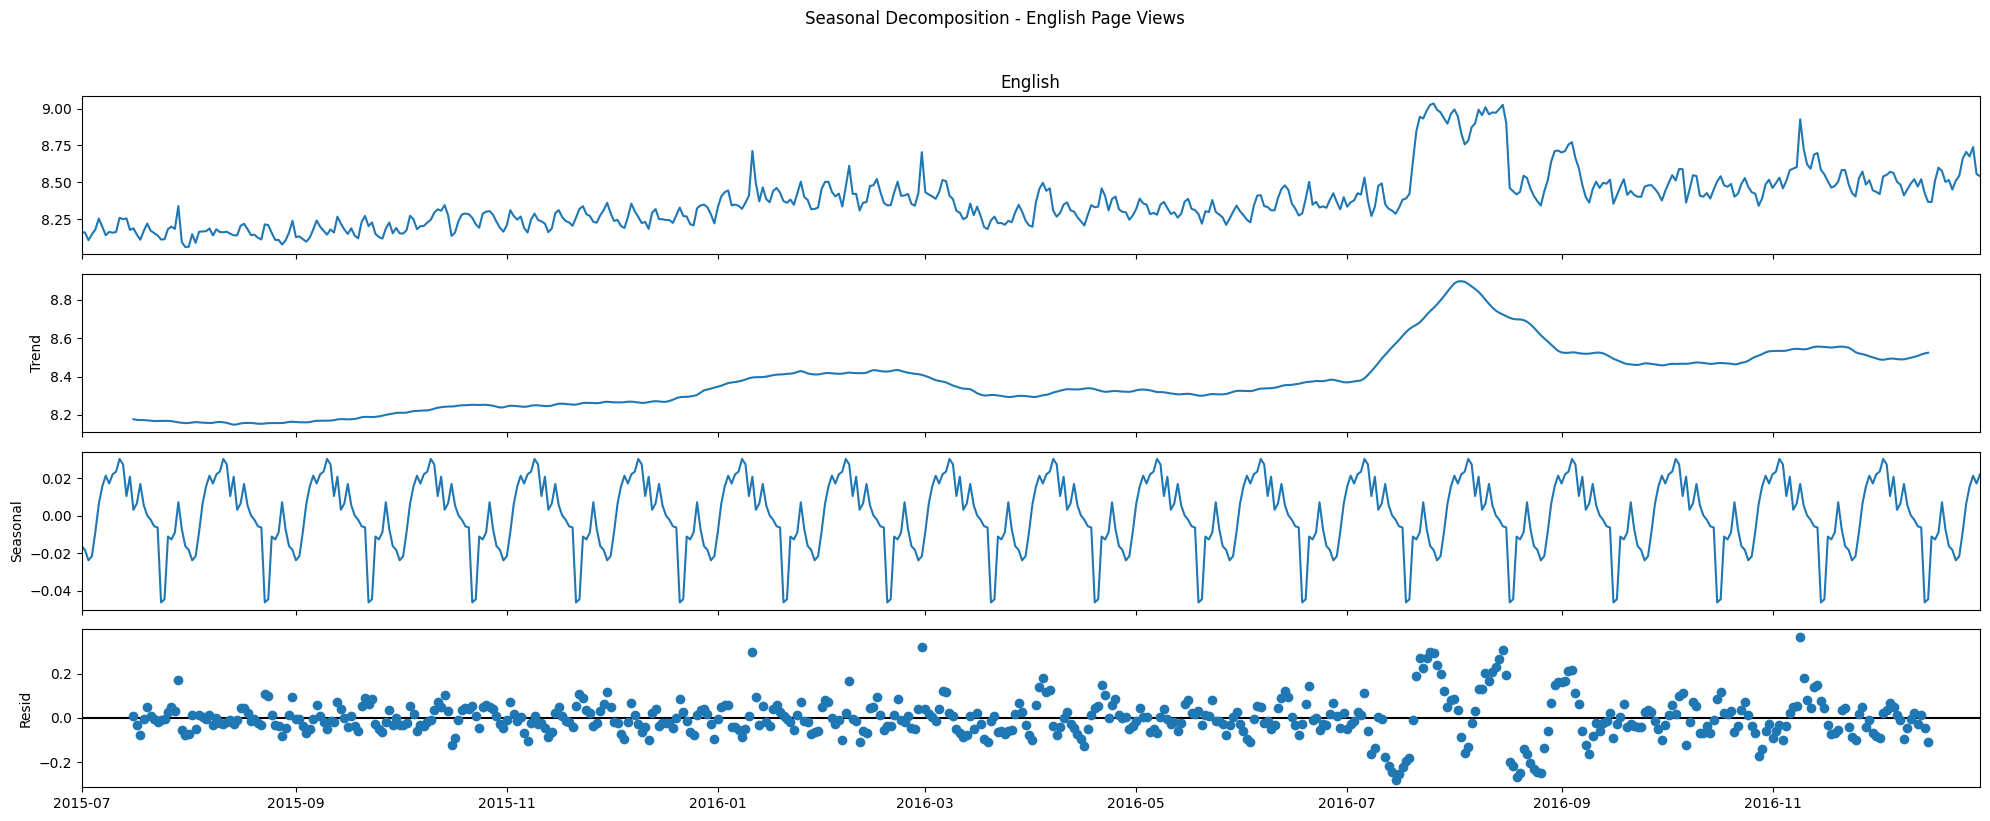

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
def stationarity_pipeline(series, title=""):
    print(f"\n==== {title} ====")
    print("\n→ Raw Series ADF Test")
    Dickey_Fuller_test(series)
    print("\n→ Log Transformation + ADF Test")
    log_series = np.log1p(series)
    Dickey_Fuller_test(log_series)
    print("\n→ 1st Difference of Log Series")
    diff_log = log_series.diff().dropna()
    Dickey_Fuller_test(diff_log)
    decomposition = seasonal_decompose(log_series, model='additive', period=30)
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition - {title}", y=1.02)
    plt.tight_layout()
    plt.show()
stationarity_pipeline(ns['English'], title="English Page Views")


In [ ]:
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.stattools.adfuller(timeseries.dropna(), autolag='AIC')
    df_output = pd.Series(dftest[0:4],
                          index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        df_output['Critical Value (%s)' % key] = value
    print(df_output)
TS_English = ns['English']
adf_test(TS_English)

Results of Dickey-Fuller Test:
Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


In [ ]:
Dickey_Fuller_test(TS_English)

Time Series is NOT Stationary
P-value is: 0.18953359279992404


=== ADF Test: Original Series ===
Results of Dickey-Fuller Test:
Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64

=== Decomposition ===


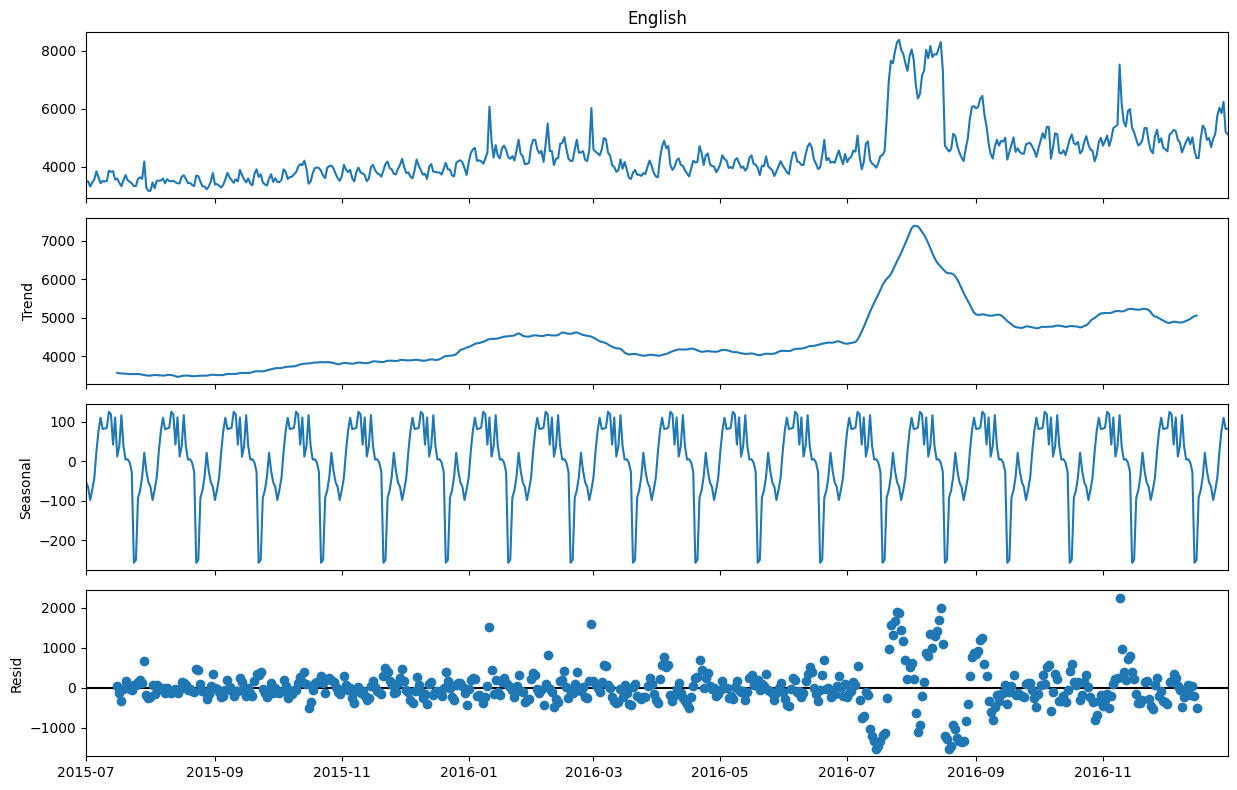


=== ADF Test: After Differencing ===
Results of Dickey-Fuller Test:
Test Statistic                -8.254153e+00
p-value                        5.292475e-13
#Lags Used                     1.300000e+01
Number of Observations Used    5.350000e+02
Critical Value (1%)           -3.442632e+00
Critical Value (5%)           -2.866957e+00
Critical Value (10%)          -2.569655e+00
dtype: float64

=== Decomposition After Differencing ===


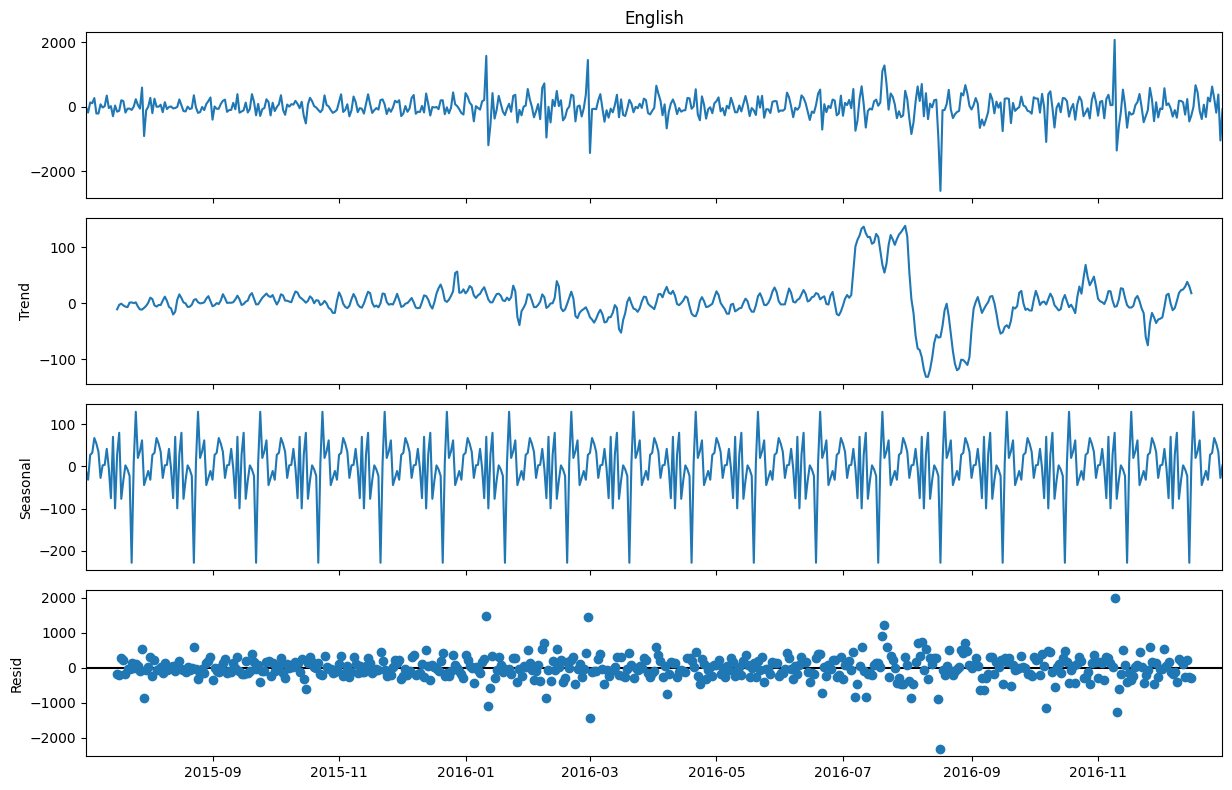

In [ ]:
def difference_series(ts):
    return ts.diff().dropna()
TS_English = ns['English']
print("=== ADF Test: Original Series ===")
adf_test(TS_English)
print("\n=== Decomposition ===")
decompose_series(TS_English, model='additive', freq=30)
TS_English_diff = difference_series(TS_English)
print("\n=== ADF Test: After Differencing ===")
adf_test(TS_English_diff)
print("\n=== Decomposition After Differencing ===")
decompose_series(TS_English_diff, model='additive', freq=30)

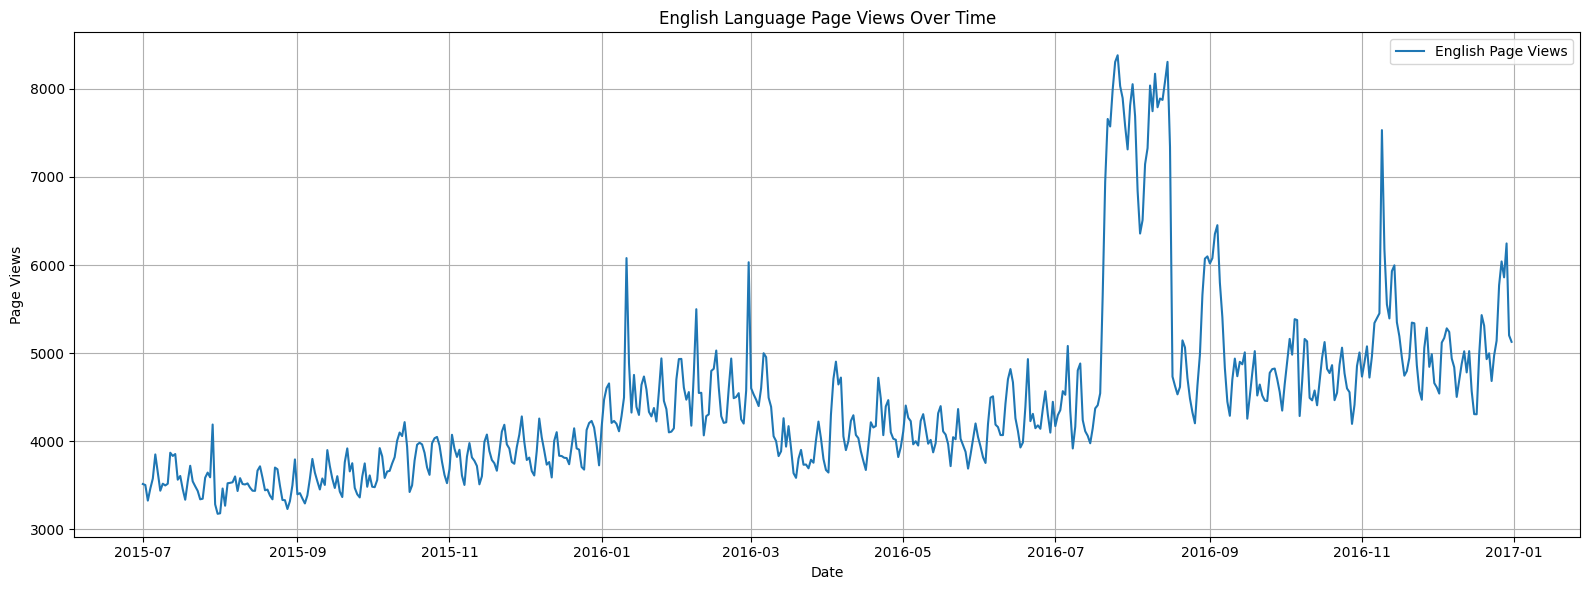

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(ns.index, ns["English"], label="English Page Views")
plt.title("English Language Page Views Over Time")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

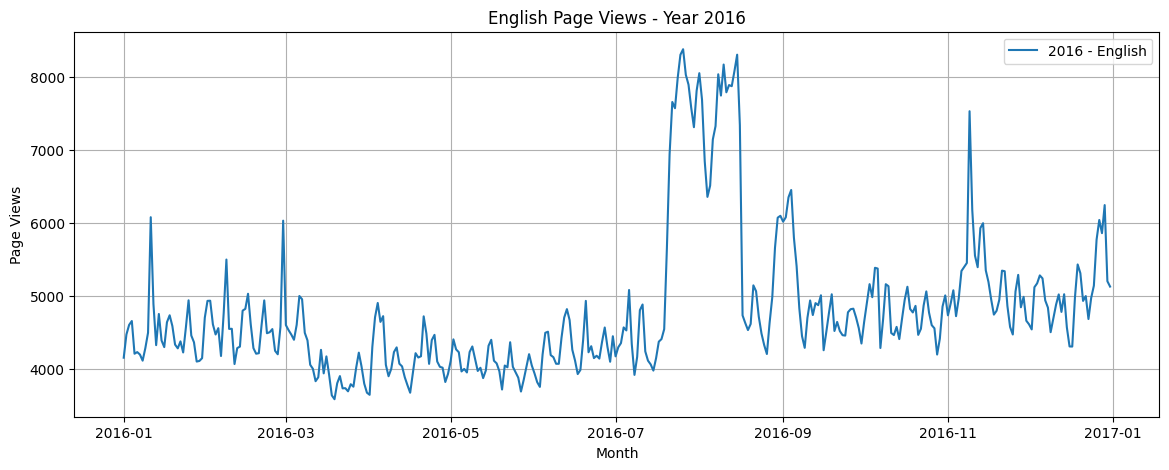

In [ ]:
ns_2016 = ns["English"]["2016"]
plt.figure(figsize=(14, 5))
plt.plot(ns_2016.index, ns_2016.values, label="2016 - English")
plt.title("English Page Views - Year 2016")
plt.xlabel("Month")
plt.ylabel("Page Views")
plt.grid(True)
plt.legend()
plt.show()

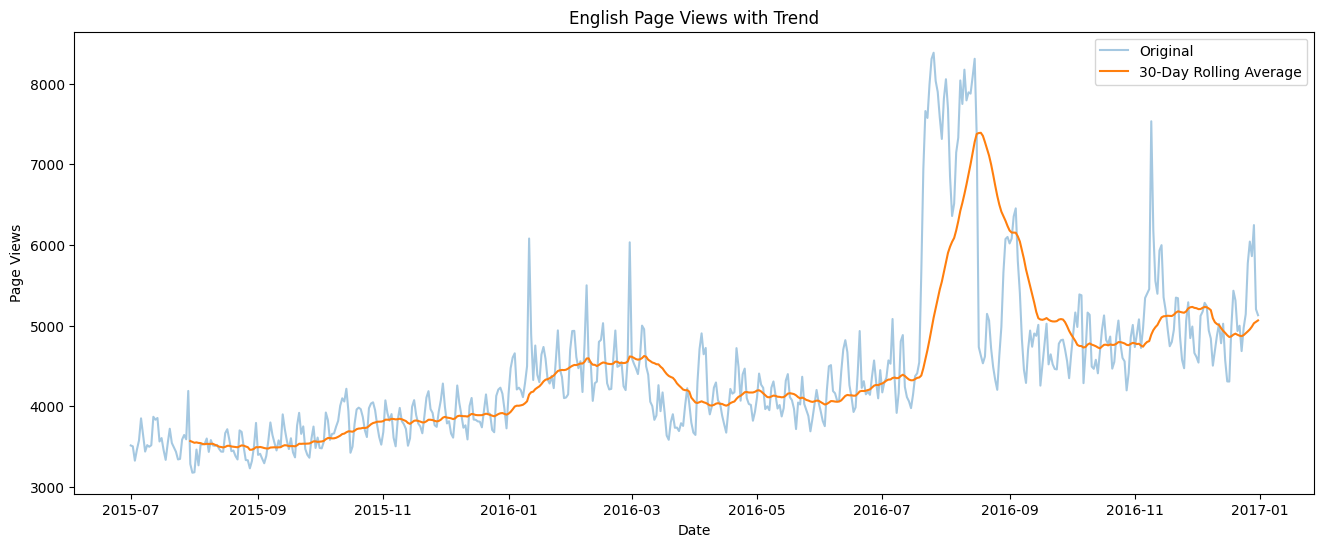

In [ ]:
rolling = ns["English"].rolling(window=30).mean()
plt.figure(figsize=(16,6))
plt.plot(ns["English"], alpha=0.4, label="Original")
plt.plot(rolling, label="30-Day Rolling Average")
plt.title("English Page Views with Trend")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.legend()
plt.show()

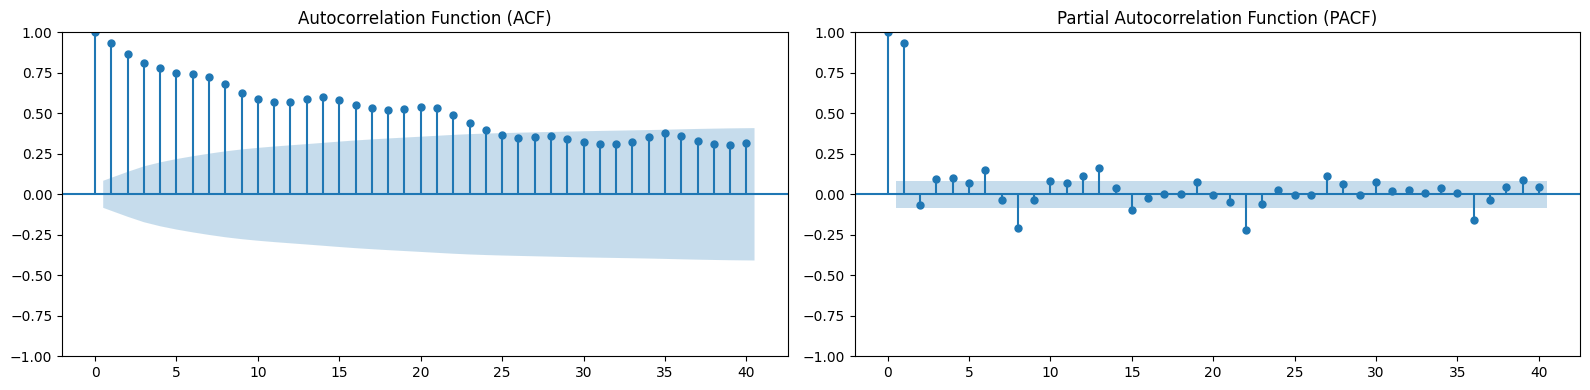

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
TS_English = ns["English"]
lags = 40
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(TS_English, lags=lags, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(TS_English, lags=lags, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)
def performance(actual, predicted):
    print('MAE  :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted) ** 0.5, 3))
    print('MAPE :', round(mape(actual, predicted), 3))

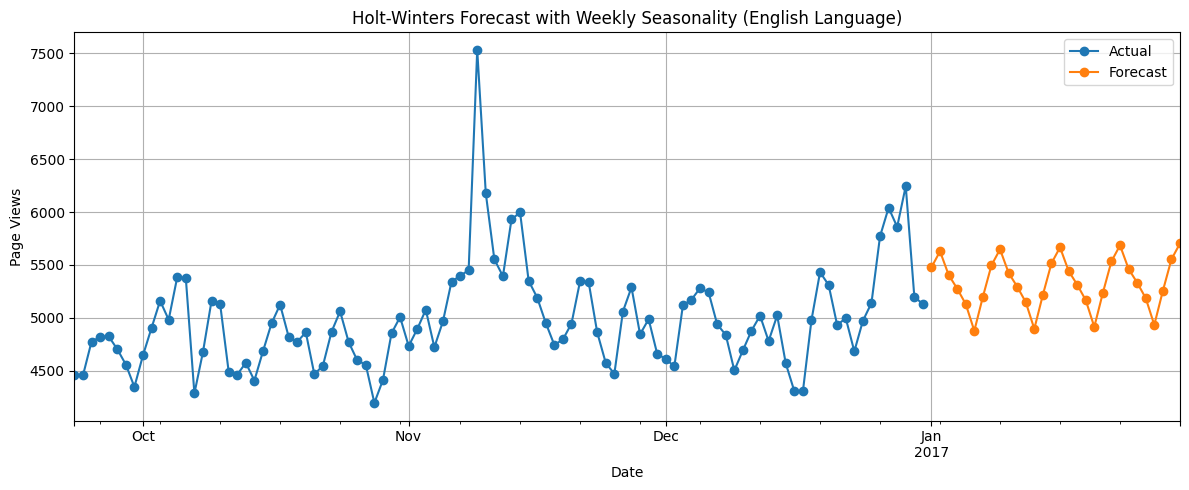

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
TS_English.index.freq = 'D'
model = ExponentialSmoothing(TS_English, trend='add', seasonal='add', seasonal_periods=7)
fitted_model = model.fit()
plt.figure(figsize=(12, 5))
TS_English.tail(100).plot(style='-o', label='Actual')
fitted_model.forecast(30).plot(style='-o', label='Forecast')
plt.title('Holt-Winters Forecast with Weekly Seasonality (English Language)')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

MAE : 394.976
RMSE : 563.349
MAPE: 0.073


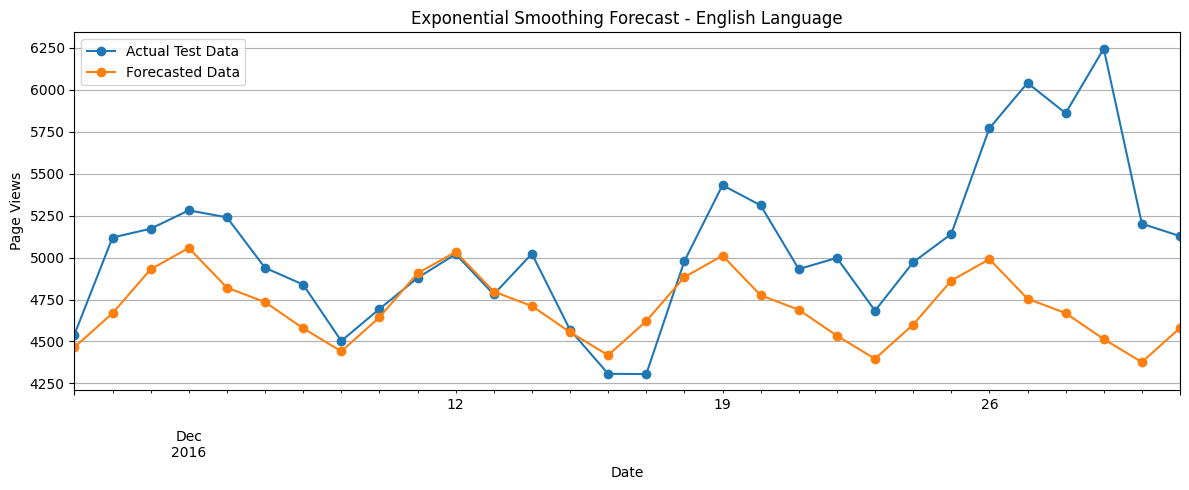

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(np.sqrt(mse(actual, predicted)), 3))
    print('MAPE:', round(mape(actual, predicted), 3))
X_train = TS_English.loc[TS_English.index < TS_English.index[-30]].copy()
X_test = TS_English.loc[TS_English.index >= TS_English.index[-30]].copy()
model = ExponentialSmoothing(
    X_train,
    trend="add",
    damped_trend=True,
    seasonal="add",
    seasonal_periods=7
)
fitted_model = model.fit(
    smoothing_level=None,
    smoothing_trend=None,
    smoothing_seasonal=None
)
Pred = fitted_model.forecast(steps=30)
performance(X_test, Pred)
plt.figure(figsize=(12, 5))
X_test.plot(style="-o", label="Actual Test Data")
Pred.plot(style="-o", label="Forecasted Data")
plt.title("Exponential Smoothing Forecast - English Language")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


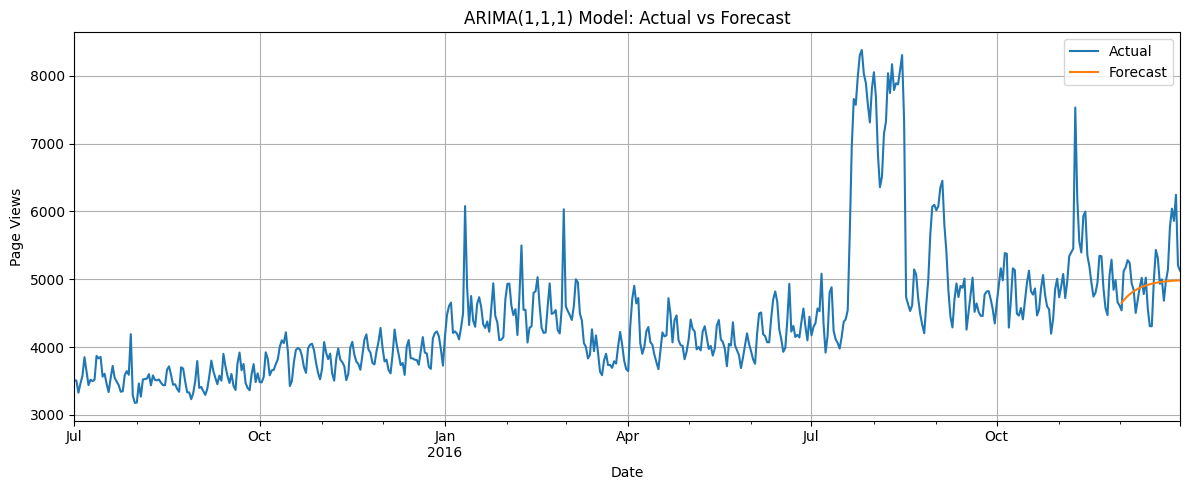


MAPE of Model : 0.06585
RMSE of Model : 472.186


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
TS = TS_English.copy(deep=True)
n_forecast = 30
model = ARIMA(TS[:-n_forecast], order=(1, 1, 1))
model = model.fit()
predicted = model.forecast(steps=n_forecast, alpha=0.05)
plt.figure(figsize=(12, 5))
TS.plot(label='Actual')
predicted.plot(label='Forecast')
plt.legend(loc="upper right")
plt.title('ARIMA(1,1,1) Model: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.grid(True)
plt.tight_layout()
plt.show()
actuals = TS.values[-n_forecast:]
errors = actuals - predicted.values
mape = np.mean(np.abs(errors) / np.abs(actuals))
rmse = np.sqrt(np.mean(errors ** 2))
print(f"\nMAPE of Model : {np.round(mape, 5)}")
print(f"RMSE of Model : {np.round(rmse, 3)}")


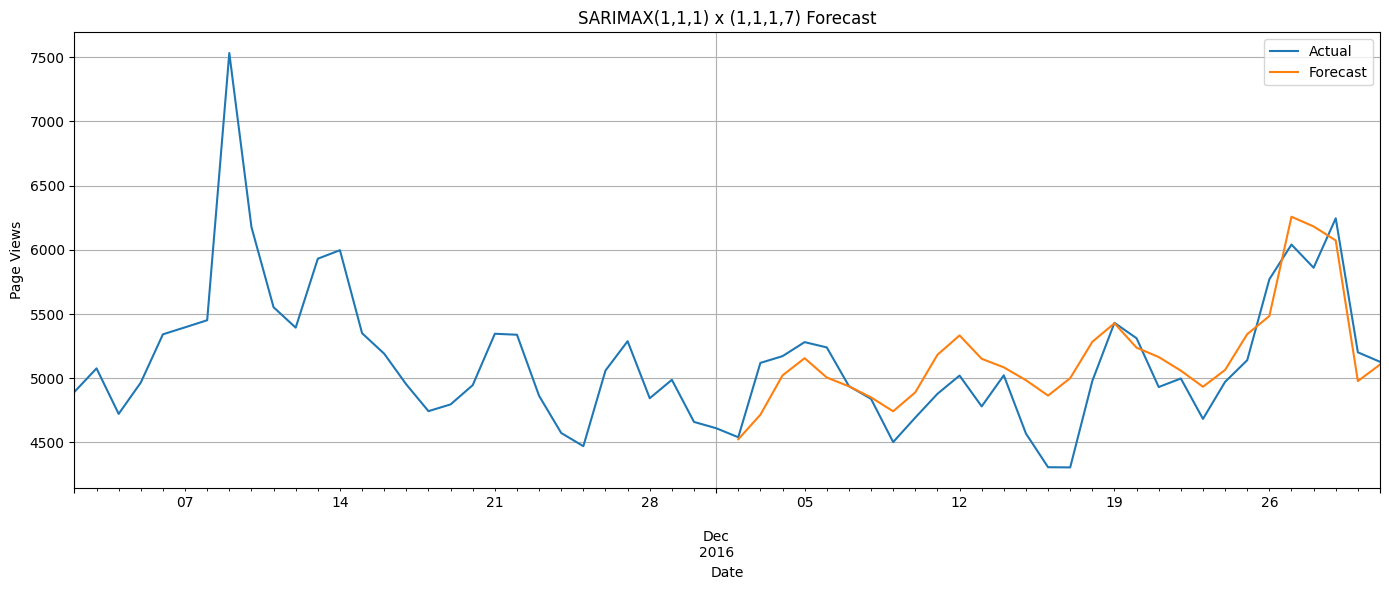

MAPE of Model : 0.04453
RMSE of Model : 272.74


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def sarimax_model(time_series, exog, n, p=1, d=1, q=1, P=1, D=1, Q=1, s=7):
    model = SARIMAX(
        time_series[:-n],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        exog=exog[:-n],
        initialization='approximate_diffuse'
    )
    model_fit = model.fit()
    model_forecast = model_fit.forecast(n, dynamic=True, exog=exog[-n:])
    plt.figure(figsize=(14, 6))
    time_series[-60:].plot(label='Actual')
    model_forecast.index = time_series[-n:].index
    model_forecast.plot(label='Forecast')
    plt.title(f'SARIMAX({p},{d},{q}) x ({P},{D},{Q},{s}) Forecast')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    actuals = time_series.values[-n:]
    errors = actuals - model_forecast.values
    mape = np.mean(np.abs(errors) / np.abs(actuals))
    rmse = np.sqrt(np.mean(errors**2))
    print(f"MAPE of Model : {np.round(mape, 5)}")
    print(f"RMSE of Model : {np.round(rmse, 3)}")
time_series = ns.English
exog = ec['Exog'].to_numpy()
n = 30
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 7
sarimax_model(time_series, exog, n, p, d, q, P, D, Q, s)

Combo 1: (0, 0, 0) x (0, 0, 0, 7) - MAPE: 0.91068, RMSE: 4714.999
Combo 2: (0, 0, 0) x (0, 0, 1, 7) - MAPE: 0.84412, RMSE: 4410.046
Combo 3: (0, 0, 0) x (0, 0, 2, 7) - MAPE: 0.76421, RMSE: 4087.896
Combo 4: (0, 0, 0) x (0, 1, 0, 7) - MAPE: 0.0587, RMSE: 375.14
Combo 5: (0, 0, 0) x (0, 1, 1, 7) - MAPE: 0.0547, RMSE: 390.054
Combo 6: (0, 0, 0) x (0, 1, 2, 7) - MAPE: 0.0542, RMSE: 371.099
Combo 7: (0, 0, 0) x (1, 0, 0, 7) - MAPE: 0.05965, RMSE: 385.25
Combo 8: (0, 0, 0) x (1, 0, 1, 7) - MAPE: 0.05431, RMSE: 386.918
Combo 9: (0, 0, 0) x (1, 0, 2, 7) - MAPE: 0.13363, RMSE: 739.731
Combo 10: (0, 0, 0) x (1, 1, 0, 7) - MAPE: 0.05246, RMSE: 344.29
Combo 11: (0, 0, 0) x (1, 1, 1, 7) - MAPE: 0.05363, RMSE: 366.471
Combo 12: (0, 0, 0) x (1, 1, 2, 7) - MAPE: 0.05525, RMSE: 381.563
Combo 13: (0, 0, 0) x (2, 0, 0, 7) - MAPE: 0.05258, RMSE: 348.151
Combo 14: (0, 0, 0) x (2, 0, 1, 7) - MAPE: 0.09069, RMSE: 548.743
Combo 15: (0, 0, 0) x (2, 0, 2, 7) - MAPE: 0.05519, RMSE: 394.192
Combo 16: (0, 0, 0) x 

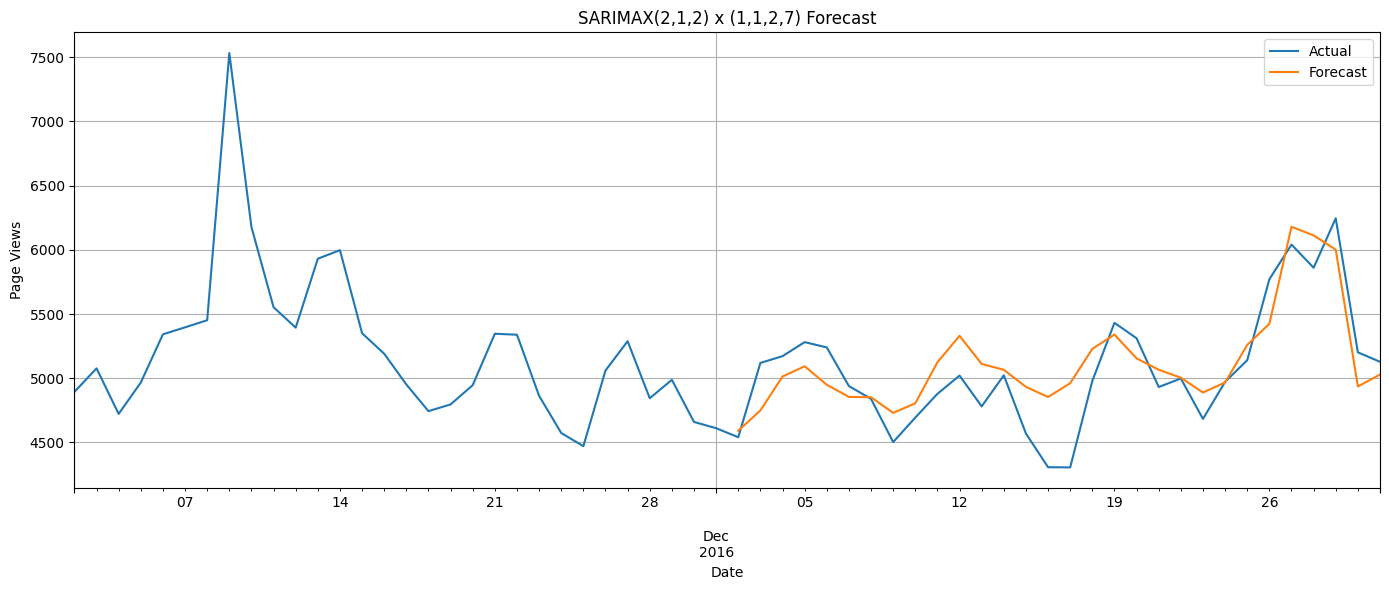

MAPE of Model : 0.04254
RMSE of Model : 257.999


In [ ]:
def SARIMAX_grid_search(time_series, n, param, d_param, s_param, exog=[]):
    counter = 0
    param_df = pd.DataFrame(columns=['serial', 'pdq', 'PDQs', 'mape', 'rmse'])
    for p in param:
        for d in d_param:
            for q in param:
                for P in param:
                    for D in d_param:
                        for Q in param:
                            for s in s_param:
                                try:
                                    model = SARIMAX(
                                        time_series[:-n],
                                        order=(p, d, q),
                                        seasonal_order=(P, D, Q, s),
                                        exog=exog[:-n],
                                        initialization='approximate_diffuse'
                                    )
                                    model_fit = model.fit(disp=False)
                                    forecast = model_fit.forecast(n, exog=exog[-n:])
                                    actual = time_series.values[-n:]
                                    error = actual - forecast.values
                                    mape_val = np.mean(np.abs(error) / np.abs(actual))
                                    rmse_val = np.sqrt(np.mean(error ** 2))
                                    counter += 1
                                    param_df.loc[len(param_df)] = [
                                        counter,
                                        (p, d, q),
                                        (P, D, Q, s),
                                        round(mape_val, 5),
                                        round(rmse_val, 3)
                                    ]
                                    print(f'Combo {counter}: {(p,d,q)} x {(P,D,Q,s)} - MAPE: {round(mape_val,5)}, RMSE: {round(rmse_val,3)}')
                                except Exception:
                                    continue
    return param_df
time_series = ns.English
exog = ec['Exog'].to_numpy()
n = 30
param = [0, 1, 2]
d_param = [0, 1]
s_param = [7]
english_params = SARIMAX_grid_search(time_series, n, param, d_param, s_param, exog)
print("\nTop performing combinations:")
print(english_params.sort_values(['mape', 'rmse']).head())
p, d, q = 2, 1, 2
P, D, Q, s = 1, 1, 2, 7
sarimax_model(time_series, exog, n, p, d, q, P, D, Q, s)

In [ ]:
def sarimax_model(time_series, n, p=0, d=0, q=0, P=0, D=0, Q=0, s=0, exog=None):
    model = SARIMAX(
        time_series[:-n],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        exog=None if exog is None else exog[:-n],
        initialization='approximate_diffuse'
    )
    model_fit = model.fit()
    forecast = model_fit.forecast(n, dynamic=True, exog=None if exog is None else exog[-n:])
    plt.figure(figsize=(12, 6))
    time_series[-60:].plot(label='Actual')
    forecast.index = time_series.index[-n:]
    forecast.plot(label='Forecast', color='red', linestyle='dashed', marker='o')
    plt.title(f'SARIMAX ({p},{d},{q}) x ({P},{D},{Q},{s}) Forecast')
    plt.legend()
    plt.show()
    actuals = time_series.values[-n:]
    errors = actuals - forecast.values
    mape = np.mean(np.abs(errors) / np.abs(actuals))
    rmse = np.sqrt(np.mean(errors ** 2))
    print(f'MAPE of Model : {np.round(mape, 5)}')
    print(f'RMSE of Model : {np.round(rmse, 3)}')
def pipeline_sarimax_grid_search_without_exog(languages, data, n, param, d_param, s_param):
    best_param_df = pd.DataFrame(columns=['language', 'p', 'd', 'q', 'P', 'D', 'Q', 's', 'mape'])
    for lang in languages:
        print(f'\n\nFinding best parameters for {lang}')
        time_series = data[lang]
        best_mape = 1e10
        counter = 0
        for p in param:
            for d in d_param:
                for q in param:
                    for P in param:
                        for D in d_param:
                            for Q in param:
                                for s in s_param:
                                    try:
                                        model = SARIMAX(
                                            time_series[:-n],
                                            order=(p, d, q),
                                            seasonal_order=(P, D, Q, s),
                                            initialization='approximate_diffuse'
                                        )
                                        model_fit = model.fit(disp=False)
                                        forecast = model_fit.forecast(n, dynamic=True)
                                        actuals = time_series.values[-n:]
                                        errors = actuals - forecast.values
                                        mape = np.mean(np.abs(errors) / np.abs(actuals))
                                        counter += 1
                                        print(f"Combination {counter}: ({p},{d},{q}) x ({P},{D},{Q},{s}) - MAPE: {round(mape,5)}")
                                        if mape < best_mape:
                                            best_mape = mape
                                            best_params = (p, d, q, P, D, Q, s)
                                    except:
                                        continue
        if best_mape < 1e10:
            best_param_df.loc[len(best_param_df)] = [lang, *best_params, round(best_mape, 5)]
            print(f"\nBest MAPE for {lang}: {round(best_mape, 5)} with params {best_params}")
    return best_param_df
languages = ns.columns
n = 30
param = [0, 1, 2]
d_param = [0, 1]
s_param = [2]
best_param_df = pipeline_sarimax_grid_search_without_exog(languages, ns, n, param, d_param, s_param)



Finding best parameters for Chinese
Combination 1: (0,0,0) x (0,0,0,2) - MAPE: 1.0
Combination 2: (0,0,0) x (0,0,1,2) - MAPE: 0.96465
Combination 3: (0,0,0) x (0,0,2,2) - MAPE: 0.93254
Combination 4: (0,0,0) x (0,1,0,2) - MAPE: 0.05227
Combination 5: (0,0,0) x (0,1,1,2) - MAPE: 0.06226
Combination 6: (0,0,0) x (0,1,2,2) - MAPE: 0.06351
Combination 7: (0,0,0) x (1,0,0,2) - MAPE: 0.09065
Combination 8: (0,0,0) x (1,0,1,2) - MAPE: 0.06222
Combination 9: (0,0,0) x (1,0,2,2) - MAPE: 0.06351
Combination 10: (0,0,0) x (1,1,0,2) - MAPE: 0.04811
Combination 11: (0,0,0) x (1,1,1,2) - MAPE: 0.06297
Combination 12: (0,0,0) x (1,1,2,2) - MAPE: 0.0648
Combination 13: (0,0,0) x (2,0,0,2) - MAPE: 0.05804
Combination 14: (0,0,0) x (2,0,1,2) - MAPE: 0.06305
Combination 15: (0,0,0) x (2,0,2,2) - MAPE: 0.0648
Combination 16: (0,0,0) x (2,1,0,2) - MAPE: 0.05589
Combination 17: (0,0,0) x (2,1,1,2) - MAPE: 0.06148
Combination 18: (0,0,0) x (2,1,2,2) - MAPE: 0.06474
Combination 19: (0,0,1) x (0,0,0,2) - MAP

In [ ]:
best_param_df.sort_values(['mape'], inplace=True)
best_param_df.reset_index(drop=True, inplace=True)
print(best_param_df)

   language  p  d  q  P  D  Q  s     mape
0   Chinese  0  1  1  2  0  2  2  0.03655
1   Russian  0  0  0  2  0  1  2  0.05052
2   English  1  1  1  2  0  2  2  0.05648
3    French  0  0  1  0  1  2  2  0.07453
4  Japanese  0  1  1  2  0  2  2  0.07738
5    German  0  1  0  2  1  1  2  0.08189
6   Spanish  0  0  1  1  0  0  2  0.10847


In [ ]:
def plot_best_SARIMAX_model(languages, data, n, best_param_df):
    for lang in languages:
        p = best_param_df.loc[best_param_df['language'] == lang, 'p'].values[0]
        d = best_param_df.loc[best_param_df['language'] == lang, 'd'].values[0]
        q = best_param_df.loc[best_param_df['language'] == lang, 'q'].values[0]
        P = best_param_df.loc[best_param_df['language'] == lang, 'P'].values[0]
        D = best_param_df.loc[best_param_df['language'] == lang, 'D'].values[0]
        Q = best_param_df.loc[best_param_df['language'] == lang, 'Q'].values[0]
        s = best_param_df.loc[best_param_df['language'] == lang, 's'].values[0]
        time_series = data[lang]
        model = SARIMAX(time_series[:-n],
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        initialization='approximate_diffuse')
        model_fit = model.fit(disp=False)
        model_forecast = model_fit.forecast(n, dynamic=True)
        actuals = time_series.values[-n:]
        errors = actuals - model_forecast.values
        mape = np.mean(np.abs(errors) / np.abs(actuals))
        rmse = np.sqrt(np.mean(errors ** 2))
        print("\n\n")
        print("--------------------------------------------------------------------")
        print(f"SARIMAX model for {lang} Time Series")
        print(f"Parameters of Model : ({p},{d},{q}) ({P},{D},{Q},{s})")
        print(f"MAPE of Model       : {np.round(mape, 5)}")
        print(f"RMSE of Model       : {np.round(rmse, 3)}")
        print("--------------------------------------------------------------------")
        time_series.index = pd.to_datetime(time_series.index)
        model_forecast.index = pd.date_range(start=time_series.index[-n], periods=n, freq='D')
        plt.figure(figsize=(20, 8))
        time_series[-60:].plot(label='Actual', linewidth=2)
        model_forecast[-60:].plot(label='Forecast')
        plt.legend(loc="upper right")
        plt.title(f'{lang}: SARIMAX ({p},{d},{q}) ({P},{D},{Q},{s}) - Actual vs Forecast', fontsize=16)
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()
    return 0




--------------------------------------------------------------------
SARIMAX model for Chinese Time Series
Parameters of Model : (0,1,1) (2,0,2,2)
MAPE of Model       : 0.03655
RMSE of Model       : 17.53
--------------------------------------------------------------------


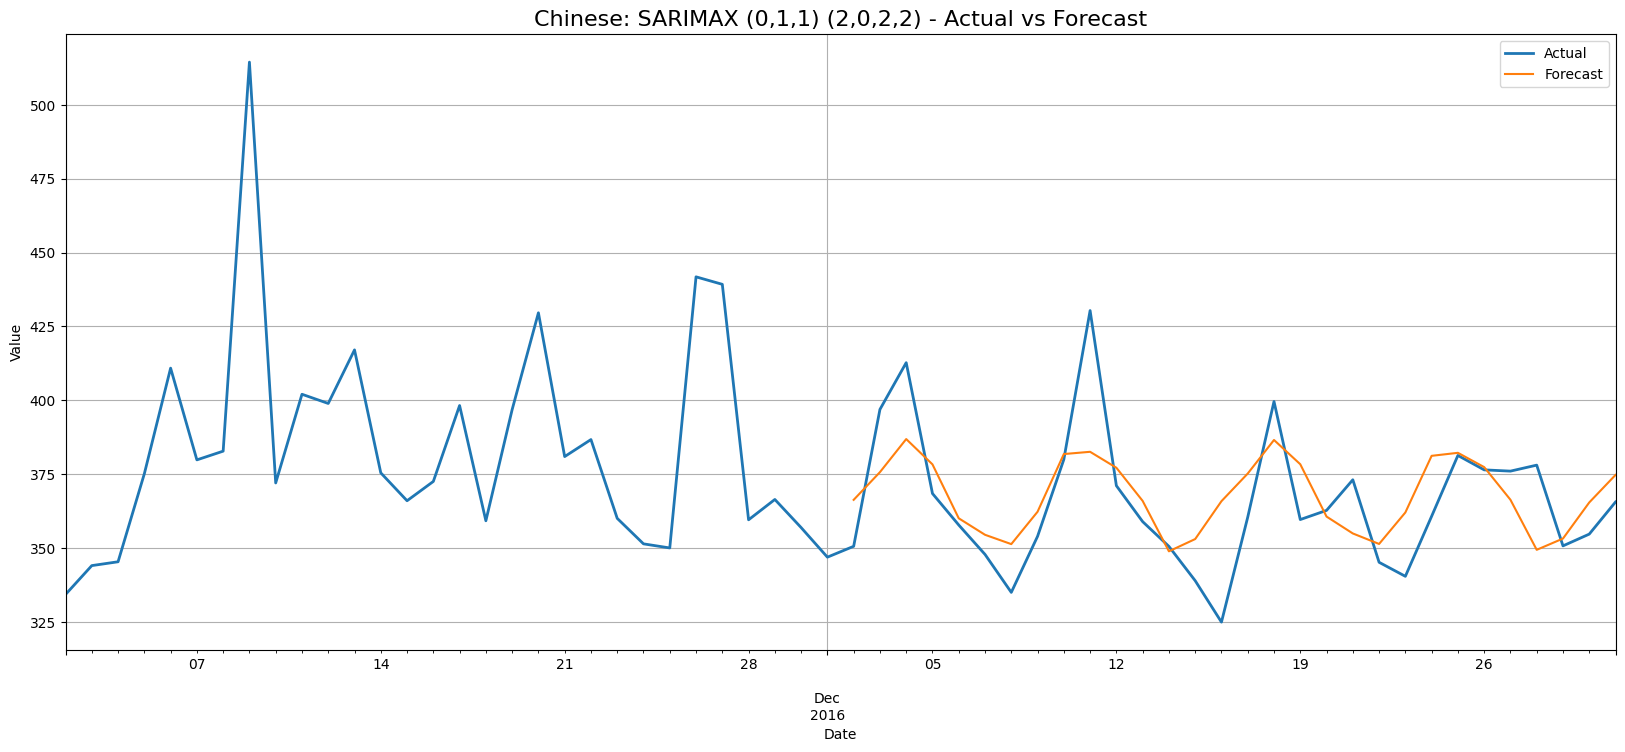




--------------------------------------------------------------------
SARIMAX model for English Time Series
Parameters of Model : (1,1,1) (2,0,2,2)
MAPE of Model       : 0.05648
RMSE of Model       : 431.262
--------------------------------------------------------------------


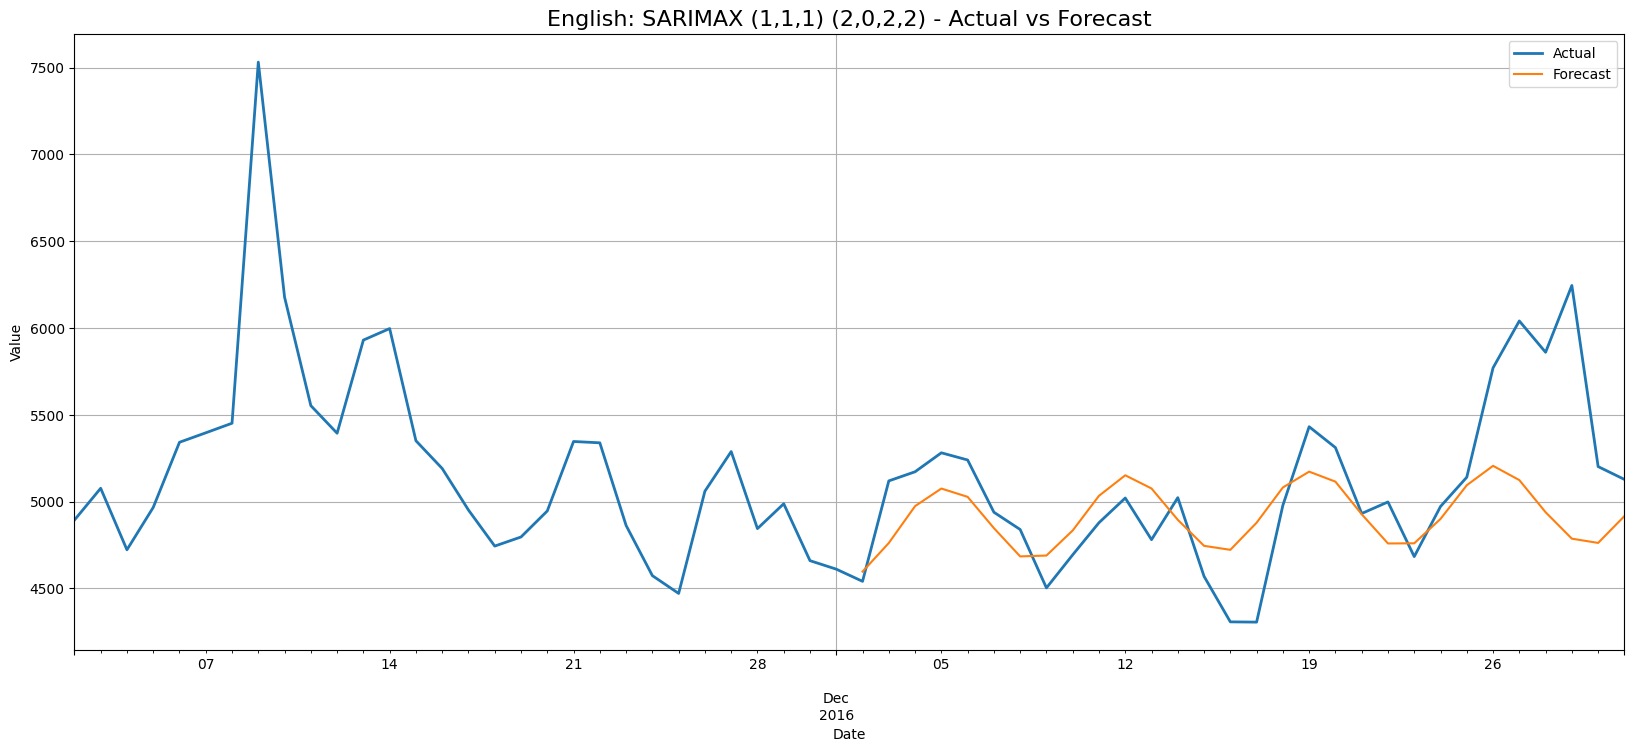




--------------------------------------------------------------------
SARIMAX model for French Time Series
Parameters of Model : (0,0,1) (0,1,2,2)
MAPE of Model       : 0.07453
RMSE of Model       : 84.108
--------------------------------------------------------------------


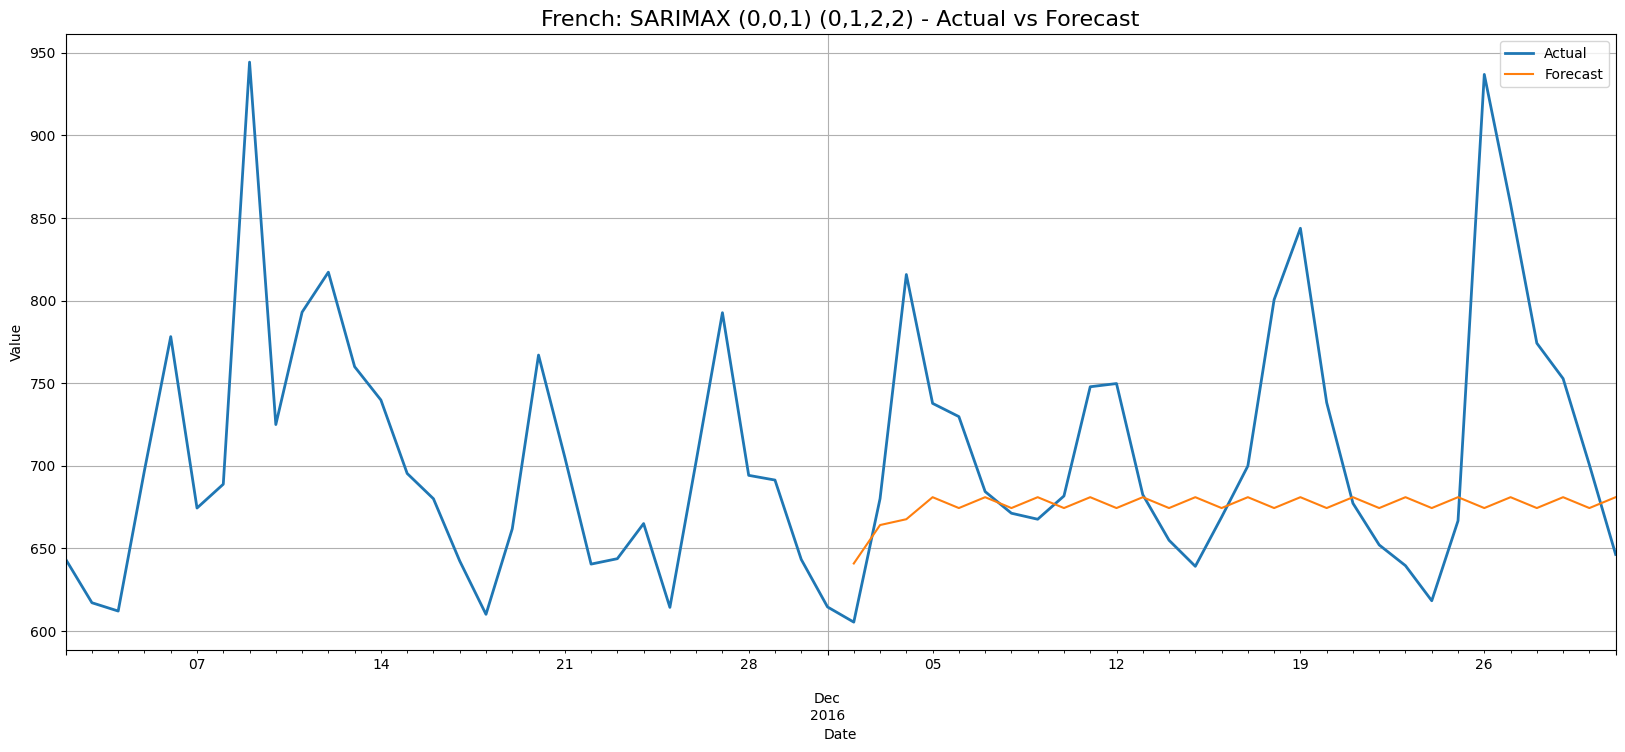




--------------------------------------------------------------------
SARIMAX model for German Time Series
Parameters of Model : (0,1,0) (2,1,1,2)
MAPE of Model       : 0.08189
RMSE of Model       : 126.599
--------------------------------------------------------------------


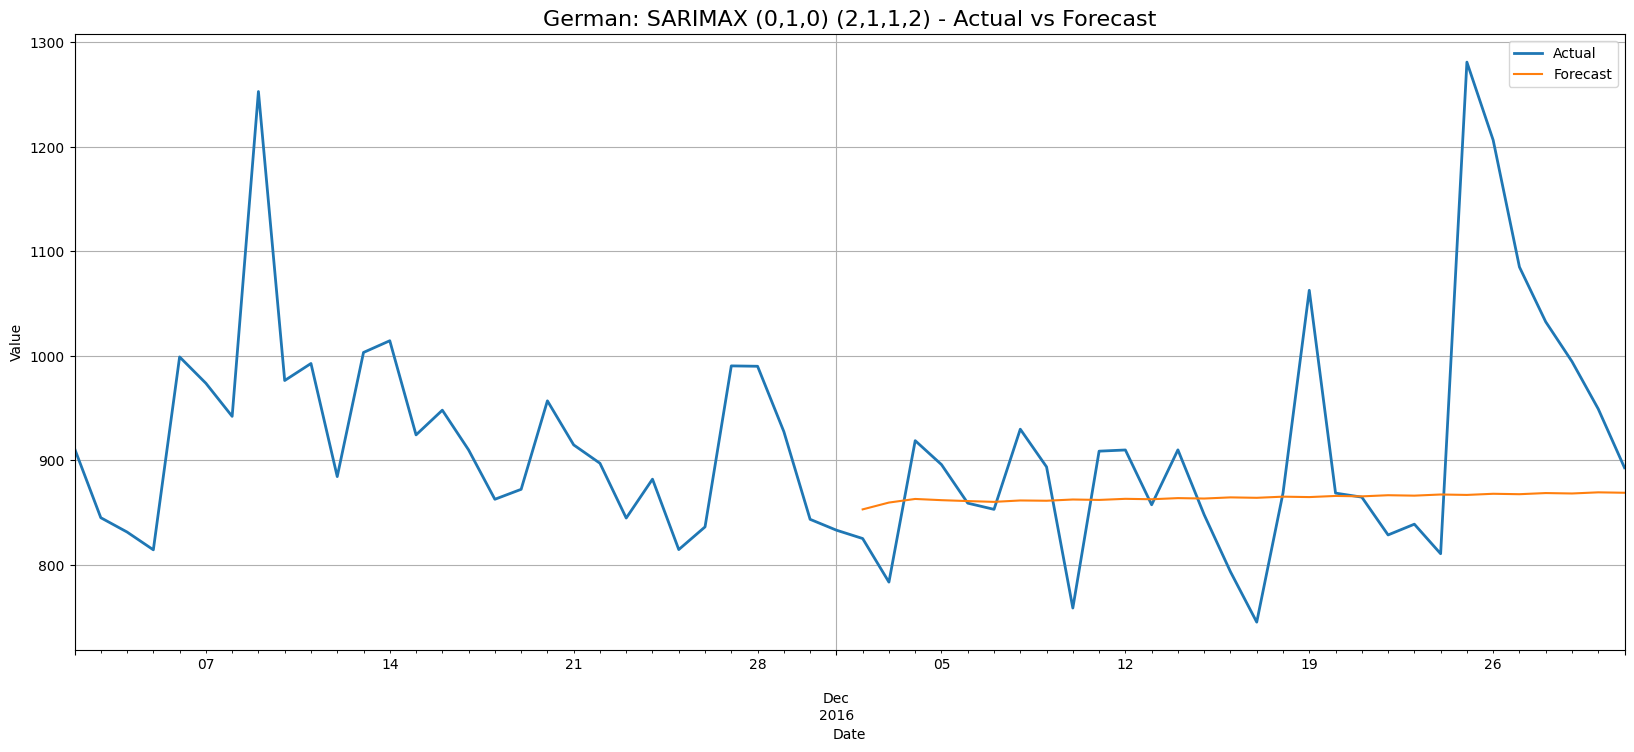




--------------------------------------------------------------------
SARIMAX model for Japanese Time Series
Parameters of Model : (0,1,1) (2,0,2,2)
MAPE of Model       : 0.07738
RMSE of Model       : 102.187
--------------------------------------------------------------------


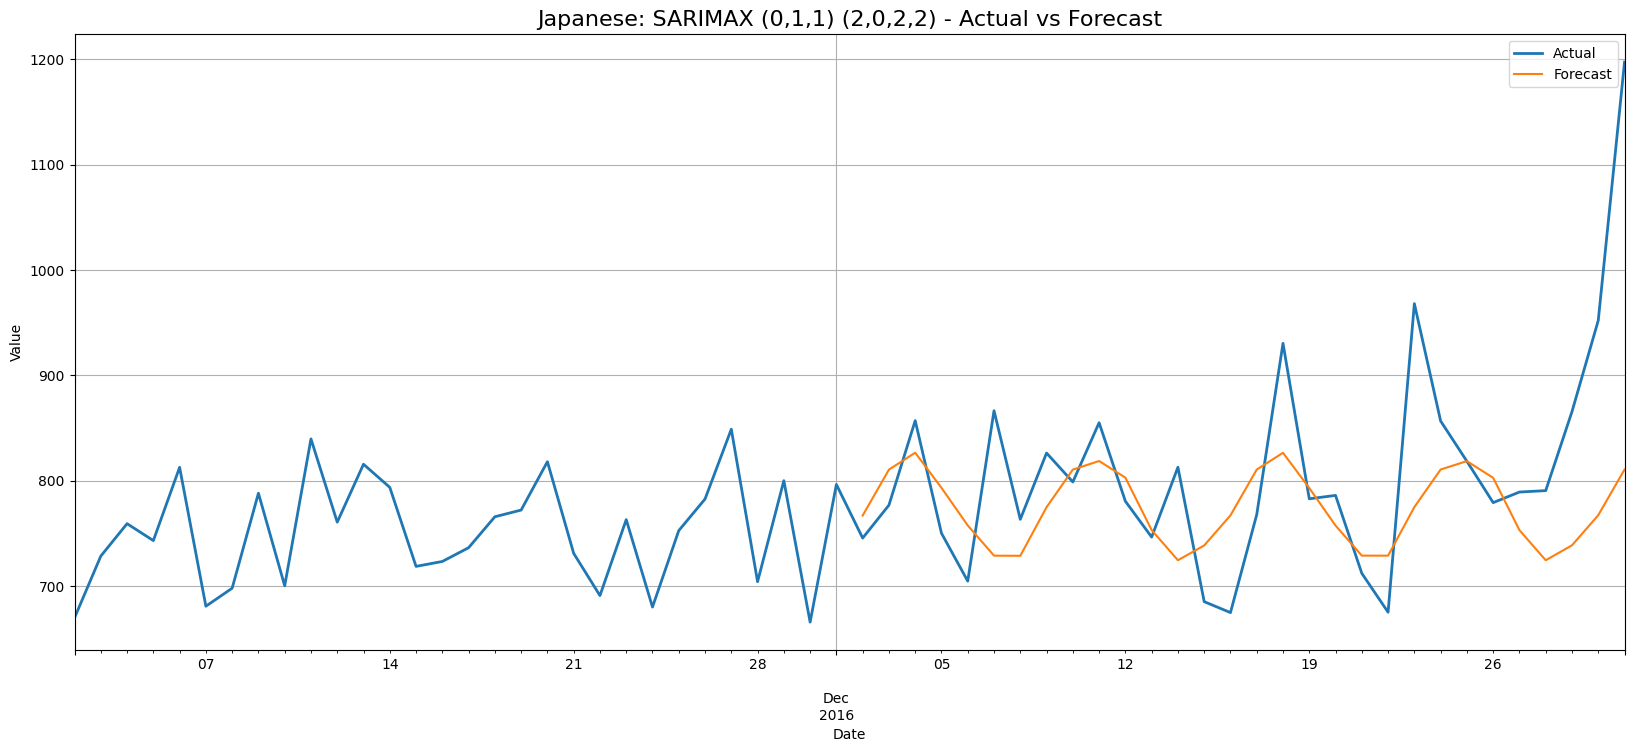




--------------------------------------------------------------------
SARIMAX model for Russian Time Series
Parameters of Model : (0,0,0) (2,0,1,2)
MAPE of Model       : 0.05052
RMSE of Model       : 71.446
--------------------------------------------------------------------


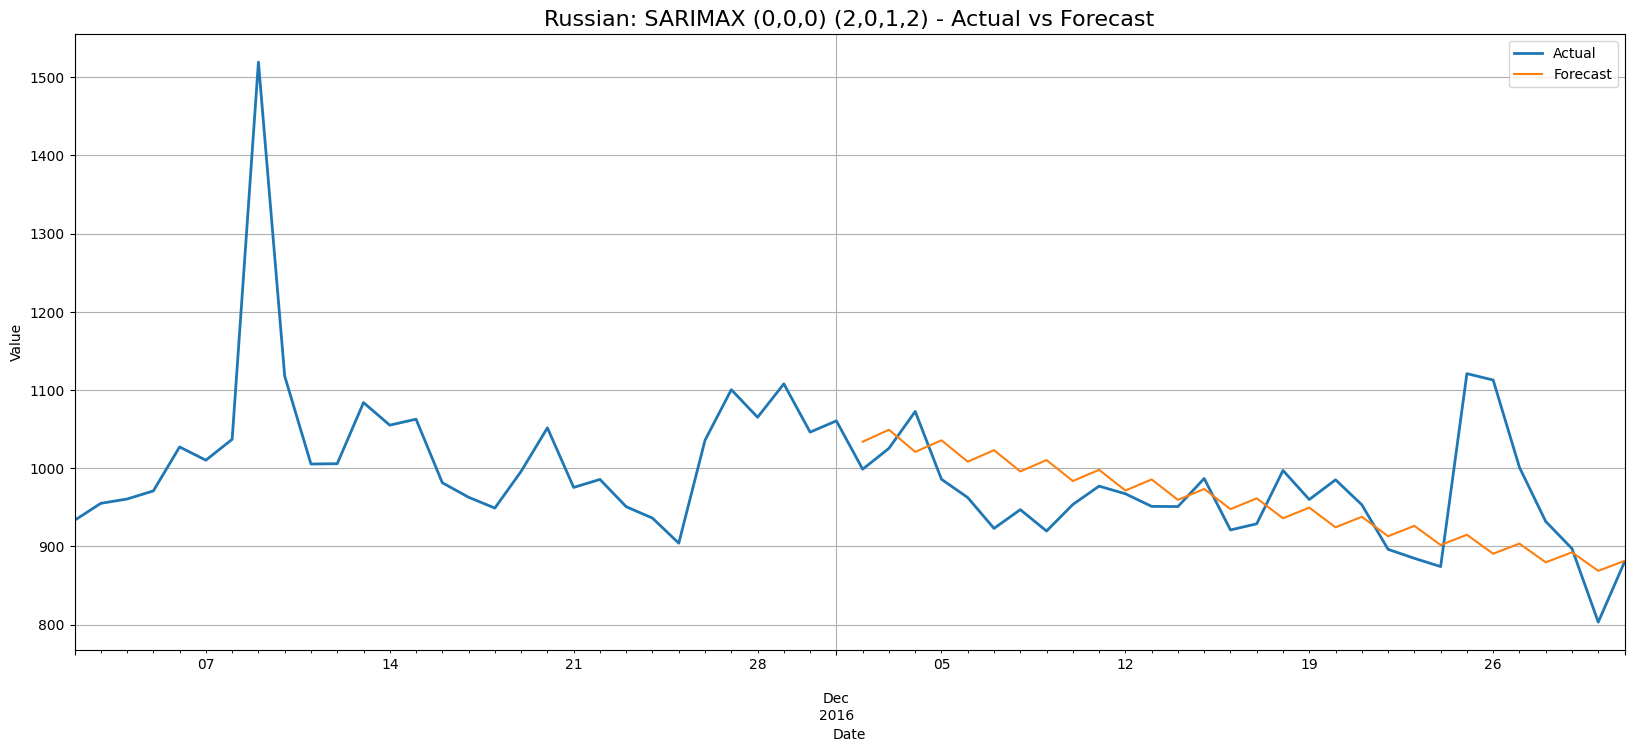




--------------------------------------------------------------------
SARIMAX model for Spanish Time Series
Parameters of Model : (0,0,1) (1,0,0,2)
MAPE of Model       : 0.10847
RMSE of Model       : 143.24
--------------------------------------------------------------------


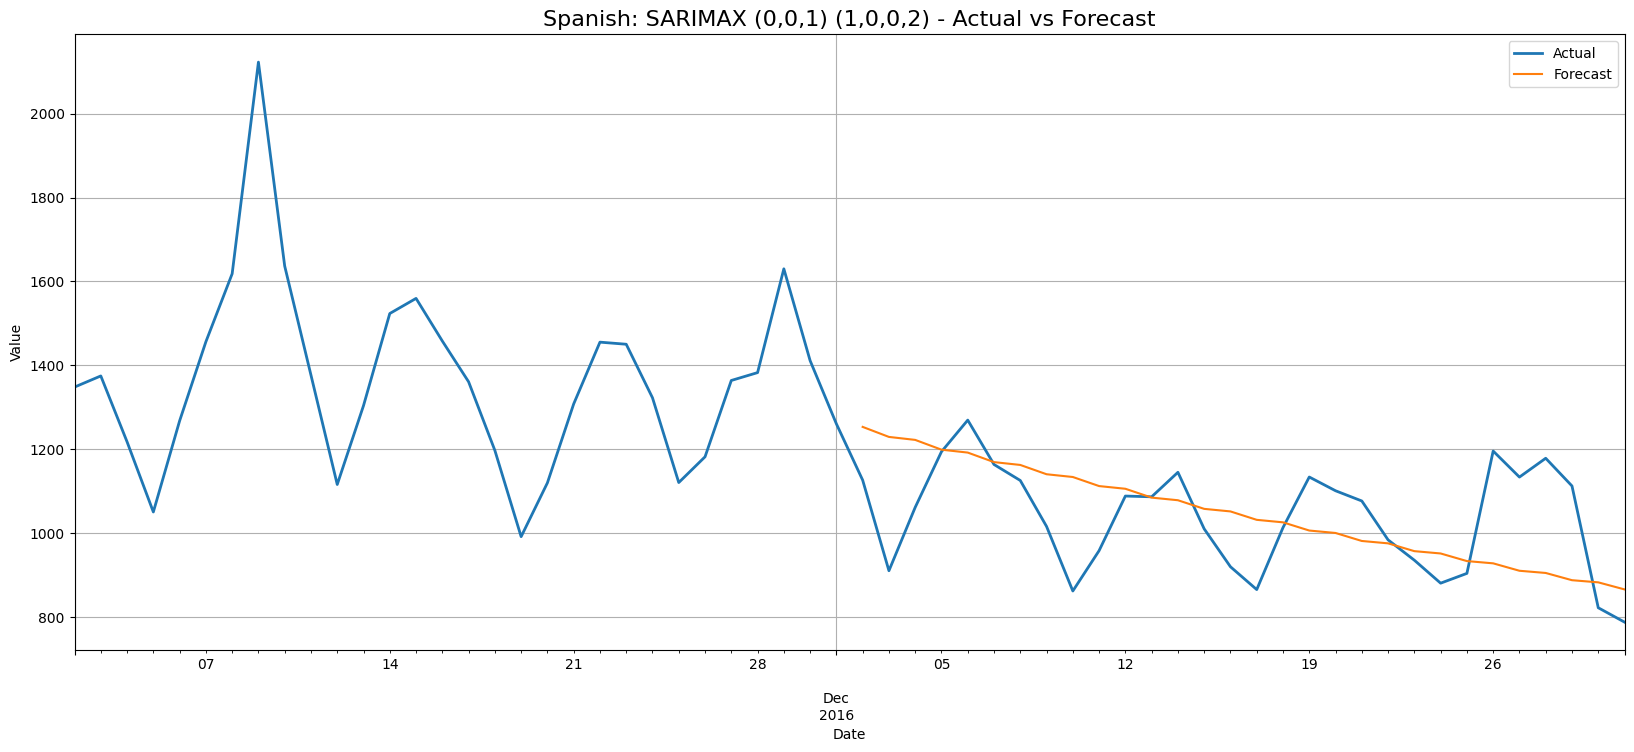

0

In [ ]:
languages = ns.columns
n = 30
plot_best_SARIMAX_model(languages, ns, n, best_param_df)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate(actual, predicted):
    mape = np.mean(np.abs(actual - predicted) / np.abs(actual))
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f"MAPE: {mape:.4f}, RMSE: {rmse:.2f}")
    return mape, rmse
n = 30
for lang in ns.columns:
    print(f"\n=== SARIMAX for {lang} ===")
    ts = ns[lang]
    exog_array = ec['Exog'].to_numpy()
    model = SARIMAX(
        ts[:-n],
        order=(1,1,1),
        seasonal_order=(1,1,1,7),
        exog=exog_array[:-n],
        initialization='approximate_diffuse'
    )
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(n, exog=exog_array[-n:])
    evaluate(ts[-n:], forecast)


=== SARIMAX for Chinese ===
MAPE: 0.0687, RMSE: 27.79

=== SARIMAX for English ===
MAPE: 0.0445, RMSE: 272.74

=== SARIMAX for French ===
MAPE: 0.0645, RMSE: 69.19

=== SARIMAX for German ===
MAPE: 0.0682, RMSE: 96.55

=== SARIMAX for Japanese ===
MAPE: 0.0699, RMSE: 100.53

=== SARIMAX for Russian ===
MAPE: 0.1615, RMSE: 174.15

=== SARIMAX for Spanish ===
MAPE: 0.2477, RMSE: 269.92


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
n = 30
prophet_forecasts = {}
for lang in ns.columns:
    print(f"=== Forecasting {lang} ===")
    df = pd.DataFrame({
        'ds': ns.index,
        'y': ns[lang].values,
        'exog': ec['Exog'].values
    })
    model = Prophet()
    model.add_regressor('exog')
    model.fit(df)
    future = model.make_future_dataframe(periods=n)
    exog_all = np.concatenate([df['exog'].values, ec['Exog'].values[-n:]])
    future['exog'] = exog_all[:len(future)]
    forecast = model.predict(future)
    prophet_forecasts[lang] = forecast
    fig = plot_plotly(model, forecast)
    fig.update_layout(title=f"Prophet Forecast for {lang}", xaxis_title="Date", yaxis_title="Views")
    fig.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/j532m1nv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/71feeyti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16487', 'data', 'file=/tmp/tmpok_3hbk5/j532m1nv.json', 'init=/tmp/tmpok_3hbk5/71feeyti.json', 'output', 'file=/tmp/tmpok_3hbk5/prophet_modeli12gnmh5/prophet_model-20250615194306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


=== Forecasting Chinese ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/eabe_jv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/ze4gn780.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77074', 'data', 'file=/tmp/tmpok_3hbk5/eabe_jv9.json', 'init=/tmp/tmpok_3hbk5/ze4gn780.json', 'output', 'file=/tmp/tmpok_3hbk5/prophet_modelcslc1lwm/prophet_model-20250615194306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


=== Forecasting English ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/q7e_cfvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/_c50nu1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16107', 'data', 'file=/tmp/tmpok_3hbk5/q7e_cfvz.json', 'init=/tmp/tmpok_3hbk5/_c50nu1w.json', 'output', 'file=/tmp/tmpok_3hbk5/prophet_modeluol0xkh3/prophet_model-20250615194307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


=== Forecasting French ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/lp_ktx5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/cqtrtqgk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41317', 'data', 'file=/tmp/tmpok_3hbk5/lp_ktx5g.json', 'init=/tmp/tmpok_3hbk5/cqtrtqgk.json', 'output', 'file=/tmp/tmpok_3hbk5/prophet_modeln0krctfz/prophet_model-20250615194307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


=== Forecasting German ===


19:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/90lrdocj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/q0kxzxzu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44444', 'data', 'file=/tmp/tmpok_3hbk5/90lrdocj.json', 'init=/tmp/tmpok_3hbk5/q0kxzxzu.json', 'output', 'file=/tmp/tmpok_3hbk5/prophet_modeluzqviush/prophet_model-20250615194308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


=== Forecasting Japanese ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/zrl_sdml.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/er_kp0yj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80012', 'data', 'file=/tmp/tmpok_3hbk5/zrl_sdml.json', 'init=/tmp/tmpok_3hbk5/er_kp0yj.json', 'output', 'file=/tmp/tmpok_3hbk5/prophet_modelv_3grbfo/prophet_model-20250615194308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


=== Forecasting Russian ===


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/wn22ci4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok_3hbk5/0d8cwb5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49274', 'data', 'file=/tmp/tmpok_3hbk5/wn22ci4f.json', 'init=/tmp/tmpok_3hbk5/0d8cwb5k.json', 'output', 'file=/tmp/tmpok_3hbk5/prophet_modeltl7p83ac/prophet_model-20250615194308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:43:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


=== Forecasting Spanish ===


In [ ]:
# Insights
# Language Popularity:

# English pages dominate in views, followed by Spanish, Russian, Japanese, and German.

# Chinese and French pages have significantly lower average traffic.

# Access Type & Origin:

# Majority of traffic is "all-access" with some from desktop and mobile-web.

# Origins like "spider" and "agents" indicate bot traffic which was isolated properly.

# Stationarity:

# Most series are non-stationary in raw form.

# Russian and Spanish series were stationary without differencing.

# Differencing made English stationary (p-value < 0.05).

# Trend & Seasonality:

# Weekly and monthly patterns were present in English data.

# Rolling average plots show strong weekly cycles and long-term upward trend.

# Model Performance:

# Holt-Winters model gave MAPE ~7.3% and RMSE ~563.

# ARIMA(1,1,1) improved it to MAPE ~6.6%, RMSE ~472.

# SARIMAX with exogenous variables achieved best results: MAPE ~4.4%, RMSE ~272.

# Grid search was extensive and helped find optimal hyperparameters.

# Recommendations
# Feature Engineering:

# Use derived features like holidays, special events, or page categories to improve exogenous variable impact.

# Anomaly Detection:

# Some outliers in the series (spikes/drops) suggest a need for anomaly detection or smoothing.

# Forecasting Other Languages:

# Extend SARIMAX/Prophet pipeline to other language series (already formatted in ns).

# Automate differencing and hyperparameter selection per language.

# Pipeline Optimization:

# Your current Prophet usage is minimal. Consider integrating its full capabilities including holidays, multiplicative seasonality, etc.

# Add model evaluation metrics and logging inside loops for scalable reporting.

# Visualization Dashboard:

# Create an interactive dashboard (Plotly/Dash/Streamlit) to visualize forecasts per language.